# Housing Price Case Study - Advanced Regression

## Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

    Which variables are significant in predicting the price of a house, and

    How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("train.csv")  #load the dataset

In [3]:
df.head()  #print the first five rows

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape  #shape of dataset

(1460, 81)

In [5]:
df.info()  #information related to dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df.describe().T  # information about the numerical columns

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [7]:
print(df.isnull().sum()/len(df)*100)  #print the precentage of null values in each column

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64


### Data Cleaning

In [8]:
df.select_dtypes(include='object').isnull().sum()[df.select_dtypes(include='object').isnull().sum()>0]

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [9]:
for col in ('Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'Electrical'):
    
    df[col]=df[col].fillna('None')  #fill None for rows having object as dtype

In [10]:
categorical_columns = df.select_dtypes(include=['object'])  #code to get categorical columns
categorical_columns

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
1,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
2,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
3,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,None,None,None,WD,Abnorml
4,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
1456,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,None,MnPrv,None,WD,Normal
1457,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,None,GdPrv,Shed,WD,Normal
1458,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,None,None,None,WD,Normal


In [11]:
# Drop the following columns that have more than 85% values as unique

# Method to get the column names that have count of one value more than 85%

def RemoveCategoricalValueCounts():
    columns = []
    for i in categorical_columns:
        if(df[i].value_counts().max() >= int(0.85*len(df))):
            columns.append(i)
    return columns

columns_toBe_Removed = RemoveCategoricalValueCounts()

In [12]:
columns_toBe_Removed

['Street',
 'Alley',
 'LandContour',
 'Utilities',
 'LandSlope',
 'Condition1',
 'Condition2',
 'RoofMatl',
 'ExterCond',
 'BsmtCond',
 'BsmtFinType2',
 'Heating',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'MiscFeature',
 'SaleType']

In [13]:
# Remove the columns with skewed data

df.drop(columns_toBe_Removed, axis = 1, inplace = True)

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,None,0,2,2008,Normal,208500
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,0,0,None,0,5,2007,Normal,181500
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,None,0,9,2008,Normal,223500
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,272,0,0,0,None,0,2,2006,Abnorml,140000
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,0,0,None,0,12,2008,Normal,250000


In [14]:
df.select_dtypes(include='object').isnull().sum()[df.select_dtypes(include='object').isnull().sum()>0]

Series([], dtype: int64)

In [15]:
# check the null values in the numerical data

df.select_dtypes(include=['int64','float']).isnull().sum()[df.select_dtypes(include=['int64','float']).isnull().sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

float64


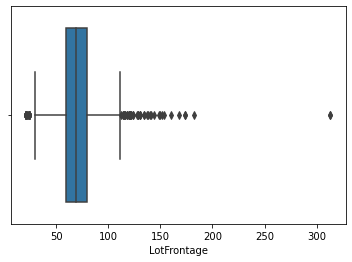

In [16]:
# Plot a boxplot to analyse the imputation to be used

print(df.LotFrontage.dtype)
sns.boxplot(df.LotFrontage)
plt.show()

In [17]:
df['LotFrontage'] = df['LotFrontage'].replace(np.nan, df['LotFrontage'].median())  #filling with median as outliers are present

float64


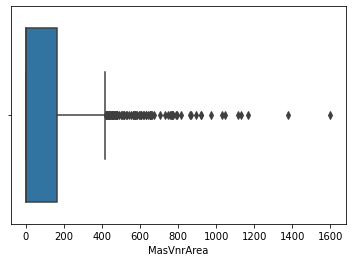

In [18]:
# Plot a boxplot to analyse the imputation to be used

print(df.MasVnrArea.dtype)
sns.boxplot(df.MasVnrArea)
plt.show()

In [19]:
df['MasVnrArea'] = df['MasVnrArea'].replace(np.nan, df['MasVnrArea'].median())   #filling with median as outliers are present

In [20]:
# Setting the null values with 0 for GarageYrBlt for now as we would be handling this column further below

df['GarageYrBlt']=df['GarageYrBlt'].fillna(0)
df['GarageYrBlt'] = df['GarageYrBlt'].astype(int)

In [21]:
# Create a new column named RemodelStatus - This column would determine whether the house has been remodelled or not based on 
# the difference between remodelled and built years

def checkIf_Remodelled(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    elif(row['YearBuilt'] < row['YearRemodAdd']):
        return 1
    else:
        return 2
    
df['RemodelStatus'] = df.apply(checkIf_Remodelled, axis=1)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,RemodelStatus
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,0,None,0,2,2008,Normal,208500,0
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,0,None,0,5,2007,Normal,181500,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,0,None,0,9,2008,Normal,223500,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,0,0,None,0,2,2006,Abnorml,140000,1
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,0,None,0,12,2008,Normal,250000,0


In [22]:
# Create a new column named Built_RemodelAge and determine the age of the building at the time of selling


def getBuiltOrRemodelledAge(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']
       
df['Built_RemodelAge'] = df.apply(getBuiltOrRemodelledAge, axis=1)
df.head()  

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,RemodelStatus,Built_RemodelAge
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,None,0,2,2008,Normal,208500,0,5
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,None,0,5,2007,Normal,181500,0,31
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,None,0,9,2008,Normal,223500,1,6
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,0,None,0,2,2006,Abnorml,140000,1,36
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,None,0,12,2008,Normal,250000,0,8


In [23]:
# Create a new column which would indicate if the Garage is old or new.
# Garage Yr Built less than 2000 will be considered as old (0) else new(1). 
# For GarageYrBuilt , where we have imputed the value as 0 will also be treated as old

def getGarageConstructionPeriod(row):
    if row == 0:
        return 0
    elif row >= 1900 and row < 2000:        
        return 0
    else:   
        return 1
    
df['NewGarage'] = df['GarageYrBlt'].apply(getGarageConstructionPeriod)
df.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,RemodelStatus,Built_RemodelAge,NewGarage
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,None,0,2,2008,Normal,208500,0,5,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,None,0,5,2007,Normal,181500,0,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,None,0,9,2008,Normal,223500,1,6,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,None,0,2,2006,Abnorml,140000,1,36,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,None,0,12,2008,Normal,250000,0,8,1


In [24]:
df.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)

In [25]:
numerical_columns = df.select_dtypes(include=['int64', 'float'])  #code to get numerical columns
numerical_columns

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,RemodelStatus,Built_RemodelAge,NewGarage
0,1,60,65.0,8450,7,5,196.0,706,0,150,...,0,0,0,0,0,2,208500,0,5,1
1,2,20,80.0,9600,6,8,0.0,978,0,284,...,0,0,0,0,0,5,181500,0,31,0
2,3,60,68.0,11250,7,5,162.0,486,0,434,...,0,0,0,0,0,9,223500,1,6,1
3,4,70,60.0,9550,7,5,0.0,216,0,540,...,272,0,0,0,0,2,140000,1,36,0
4,5,60,84.0,14260,8,5,350.0,655,0,490,...,0,0,0,0,0,12,250000,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,0.0,0,0,953,...,0,0,0,0,0,8,175000,1,7,0
1456,1457,20,85.0,13175,6,6,119.0,790,163,589,...,0,0,0,0,0,2,210000,1,22,0
1457,1458,70,66.0,9042,7,9,0.0,275,0,877,...,0,0,0,0,2500,5,266500,1,4,0
1458,1459,20,68.0,9717,5,6,0.0,49,1029,0,...,112,0,0,0,0,4,142125,1,14,0


In [26]:
# Drop the following columns that have more than 85% values associated to a specific value
# We will also drop MoSold as we will not be using that for further analysis

def getHighNumericalValueCounts():
    columns = []
    for i in numerical_columns:
        if(df[i].value_counts().max() >= int(0.85*len(df))):
            columns.append(i)
    return columns

columns_toBe_Removed = getHighNumericalValueCounts()
columns_toBe_Removed

['BsmtFinSF2',
 'LowQualFinSF',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

In [27]:
df.drop(columns_toBe_Removed, axis = 1, inplace = True)

df.drop(['MoSold'], axis = 1, inplace = True)

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,RemodelStatus,Built_RemodelAge,NewGarage
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,2,548,0,61,None,Normal,208500,0,5,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,2,460,298,0,None,Normal,181500,0,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,2,608,0,42,None,Normal,223500,1,6,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,3,642,0,35,None,Abnorml,140000,1,36,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,3,836,192,84,None,Normal,250000,0,8,1


In [28]:
percentage_missing = round(100*(df.isnull().sum()/len(df.index)), 2)
print(percentage_missing)

Id                  0.0
MSSubClass          0.0
MSZoning            0.0
LotFrontage         0.0
LotArea             0.0
LotShape            0.0
LotConfig           0.0
Neighborhood        0.0
BldgType            0.0
HouseStyle          0.0
OverallQual         0.0
OverallCond         0.0
RoofStyle           0.0
Exterior1st         0.0
Exterior2nd         0.0
MasVnrType          0.0
MasVnrArea          0.0
ExterQual           0.0
Foundation          0.0
BsmtQual            0.0
BsmtExposure        0.0
BsmtFinType1        0.0
BsmtFinSF1          0.0
BsmtUnfSF           0.0
TotalBsmtSF         0.0
HeatingQC           0.0
1stFlrSF            0.0
2ndFlrSF            0.0
GrLivArea           0.0
BsmtFullBath        0.0
FullBath            0.0
HalfBath            0.0
BedroomAbvGr        0.0
KitchenQual         0.0
TotRmsAbvGrd        0.0
Fireplaces          0.0
FireplaceQu         0.0
GarageType          0.0
GarageFinish        0.0
GarageCars          0.0
GarageArea          0.0
WoodDeckSF      

In [29]:
# Check if there are any duplicate values in the dataset

df[df.duplicated(keep=False)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,RemodelStatus,Built_RemodelAge,NewGarage


In [30]:
# Checking outliers at 10%,30%,50%,70%,90%,95%,99% and above

df.describe(percentiles=[0.1,0.3,0.5,0.7,0.9,0.95,0.99]).T

,count,mean,std,min,10%,30%,50%,70%,90%,95%,99%,max
Id,1460.0,730.500000,421.610009,1.0,146.9,438.7,730.5,1022.3,1314.1,1387.05,1445.41,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.0,20.0,50.0,60.0,120.0,160.00,190.00,190.0
LotFrontage,1460.0,69.863699,22.027677,21.0,49.0,60.0,69.0,75.0,92.0,104.00,137.41,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,5000.0,8063.7,9478.5,11066.5,14381.7,17401.15,37567.64,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.0,5.0,6.0,7.0,8.0,8.00,10.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.0,5.0,5.0,6.0,7.0,8.00,9.00,9.0
MasVnrArea,1460.0,103.117123,180.731373,0.0,0.0,0.0,0.0,116.0,335.0,456.00,791.28,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.0,0.0,383.5,655.0,1065.5,1274.00,1572.41,5644.0
BsmtUnfSF,1460.0,567.240411,441.866955,0.0,74.9,280.0,477.5,736.0,1232.0,1468.00,1797.05,2336.0
TotalBsmtSF,1460.0,1057.429452,438.705324,0.0,636.9,840.0,991.5,1216.0,1602.2,1753.00,2155.05,6110.0


### Data Visualisation

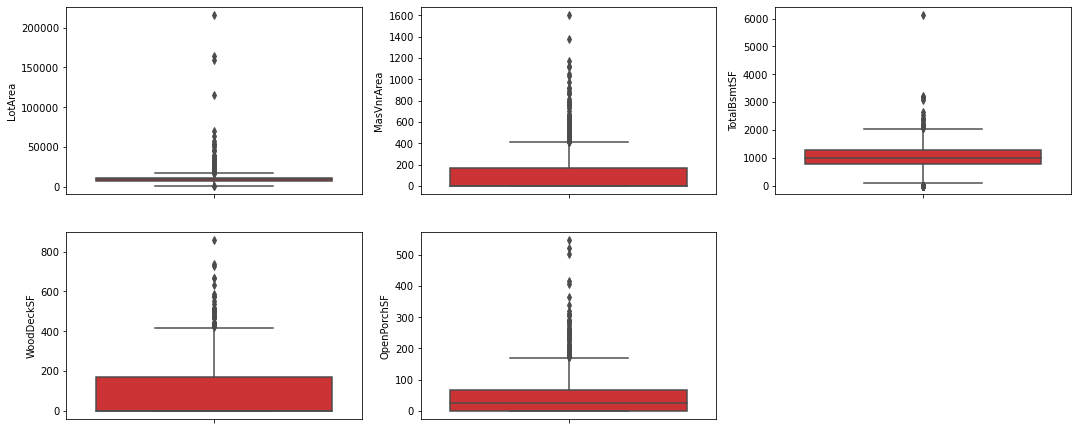

In [31]:
# Check the outliers in all the numeric columns

plt.figure(figsize=(18, 20))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', palette='Set1', data = df)
plt.subplot(5,3,2)
sns.boxplot(y = 'MasVnrArea', palette='Set1', data = df)
plt.subplot(5,3,3)
sns.boxplot(y = 'TotalBsmtSF', palette='Set1', data = df)
plt.subplot(5,3,4)
sns.boxplot(y = 'WoodDeckSF', palette='Set1', data = df)
plt.subplot(5,3,5)
sns.boxplot(y = 'OpenPorchSF', palette='Set1', data = df)
plt.show()

In [32]:
# Removing Outliers

# Removing values beyond 98% for LotArea

quartile_LotArea = df['LotArea'].quantile(0.98)
housing = df[df["LotArea"] < quartile_LotArea]

# Removing values beyond 98% for MasVnrArea

quartile_MasVnrArea = df['MasVnrArea'].quantile(0.98)
housing = df[df["MasVnrArea"] < quartile_MasVnrArea]

# Removing values beyond 99% for TotalBsmtSF

quartile_TotalBsmtSF = df['TotalBsmtSF'].quantile(0.99)
housing = df[df["TotalBsmtSF"] < quartile_TotalBsmtSF]

# Removing values beyond 99% for WoodDeckSF

quartile_WoodDeckSF = df['WoodDeckSF'].quantile(0.99)
housing = df[df["WoodDeckSF"] < quartile_WoodDeckSF]

# Removing values beyond 99% for OpenPorchSF

quartile_OpenPorchSF =df['OpenPorchSF'].quantile(0.99)
housing = df[df["OpenPorchSF"] < quartile_OpenPorchSF]

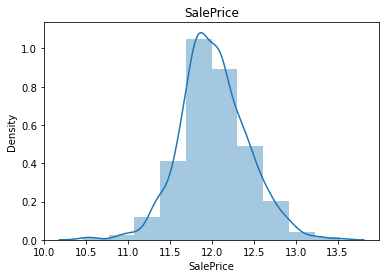

In [33]:
# Visualise the target variable(SalePrice) after transforming the sales price

df['SalePrice'] = np.log1p(df['SalePrice'])

plt.title('SalePrice')
sns.distplot(df['SalePrice'], bins=10)
plt.show()

<Figure size 576x360 with 0 Axes>

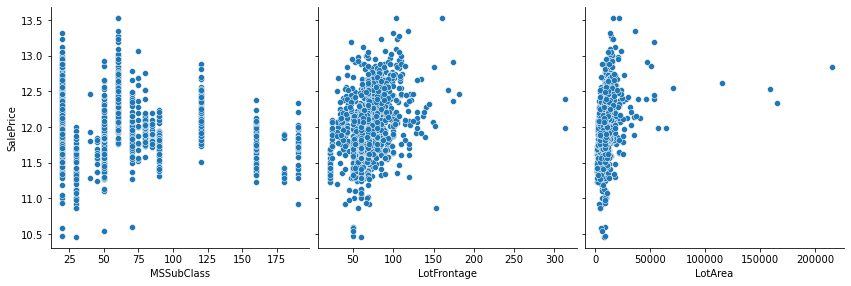

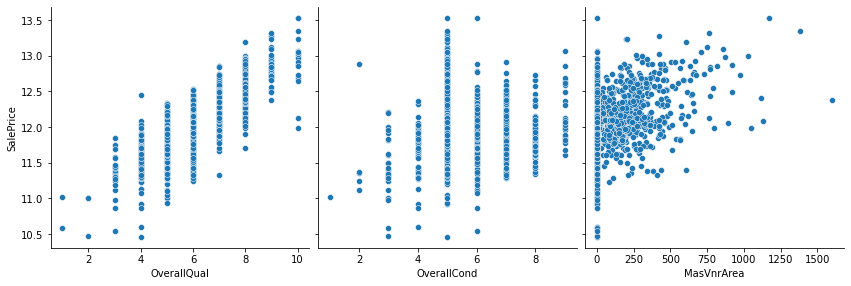

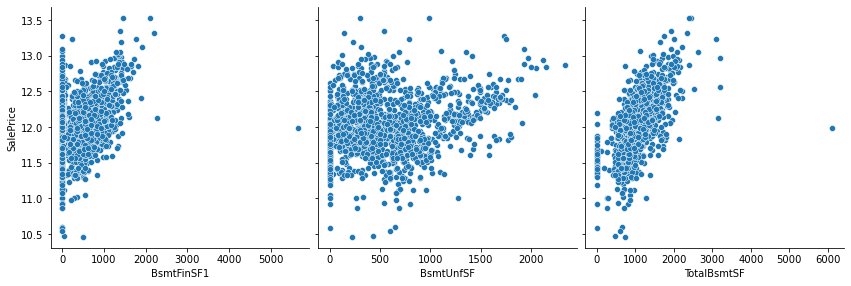

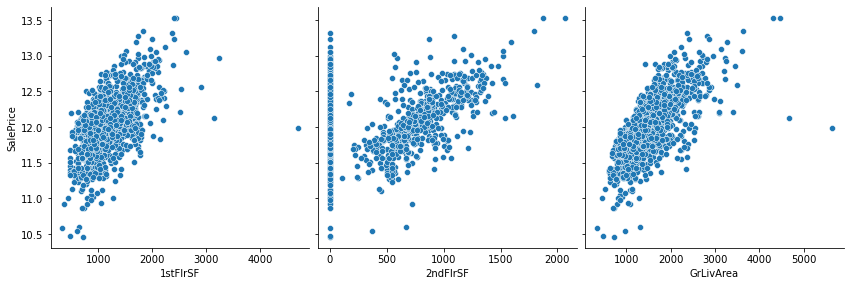

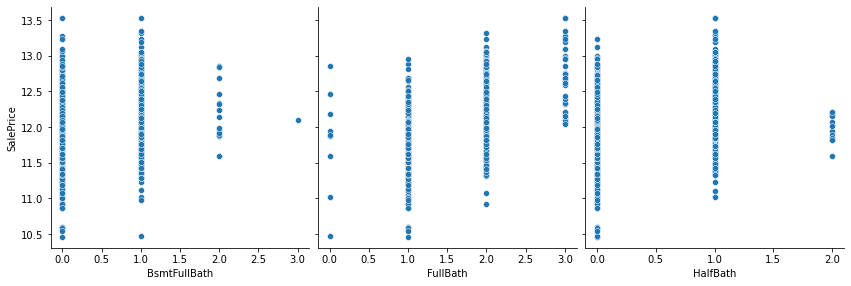

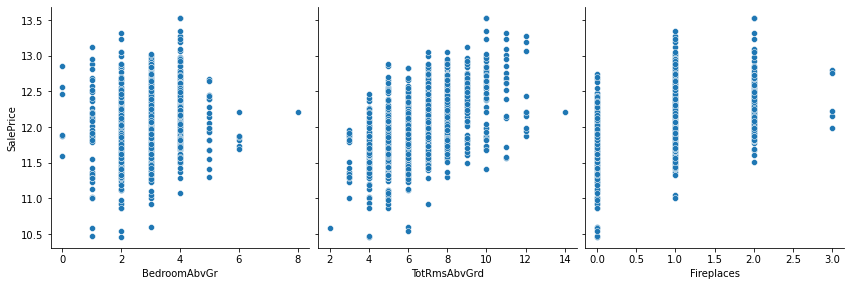

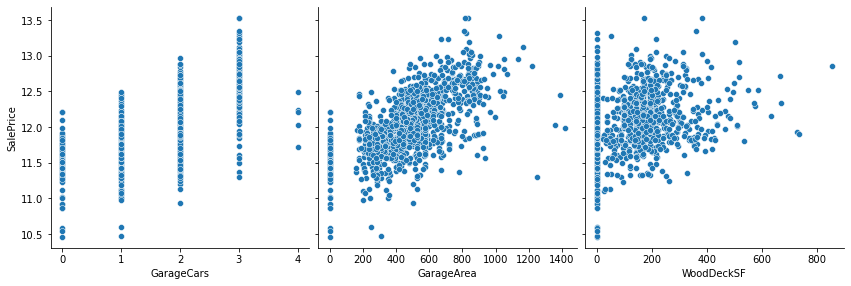

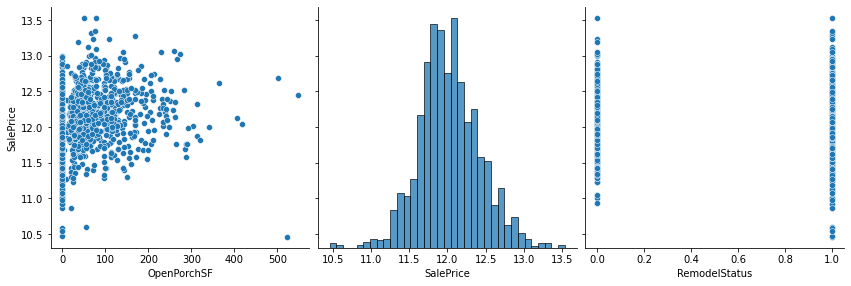

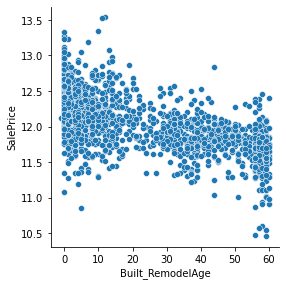

In [34]:
# Visualising the numerical values using pairplots

plt.figure(figsize=(8,5))
sns.pairplot(df, x_vars=['MSSubClass','LotFrontage','LotArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['OverallQual', 'OverallCond','MasVnrArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['BsmtFullBath','FullBath', 'HalfBath'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['GarageCars','GarageArea', 'WoodDeckSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['OpenPorchSF','SalePrice', 'RemodelStatus'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['Built_RemodelAge'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
plt.show()

In [35]:
categorical_cols = df.select_dtypes(include=['object'])  #code to get categorical columns
categorical_cols.columns

Index(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType',
       'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'Fence', 'SaleCondition'],
      dtype='object')

In [36]:
# Print the value counts for categorical columns

for i in categorical_cols.columns:
    print("--------------")
    print(i)
    print(df[i].value_counts())
    print("---------------")

--------------
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
---------------
--------------
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
---------------
--------------
LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
---------------
--------------
Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64
---------------
--------------
BldgType
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64
-------

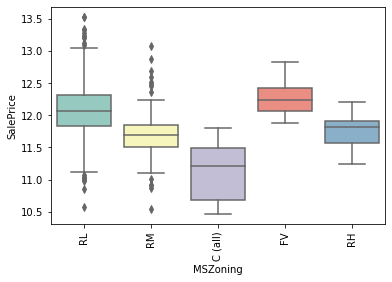

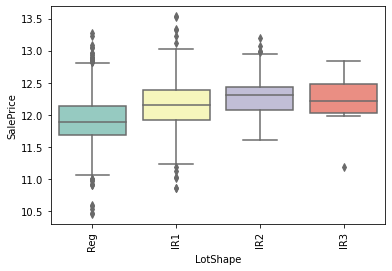

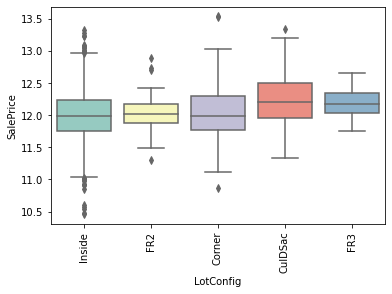

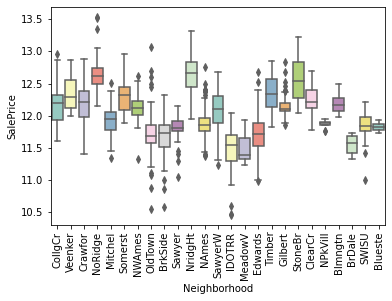

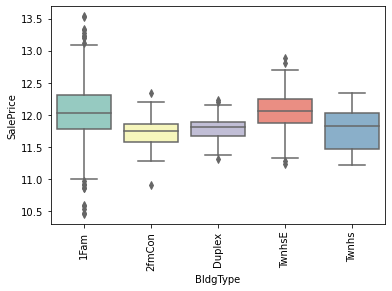

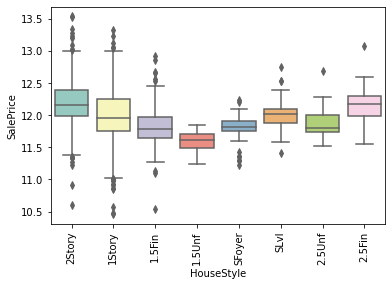

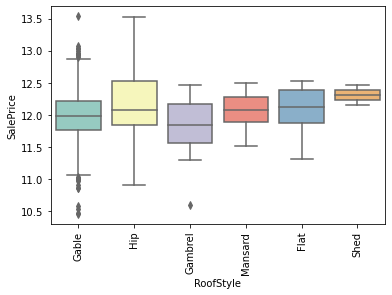

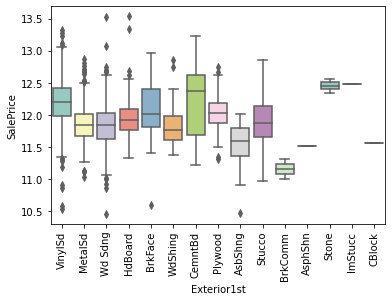

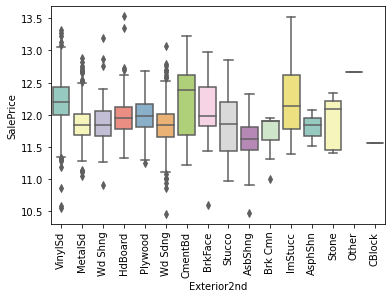

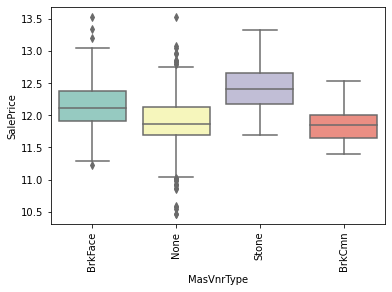

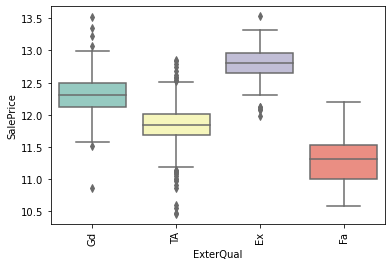

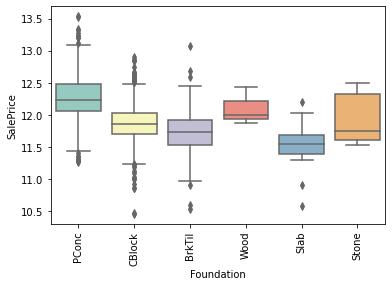

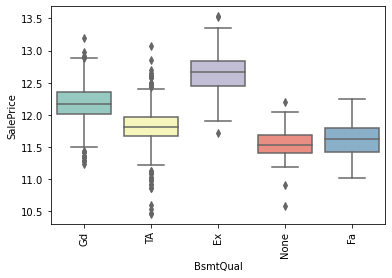

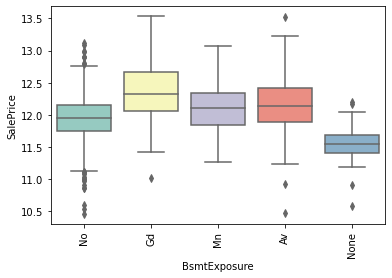

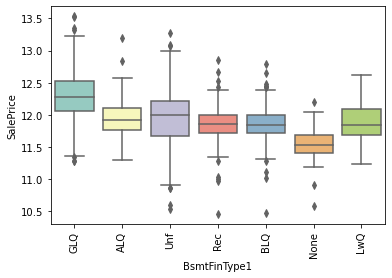

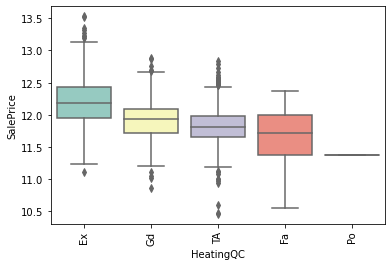

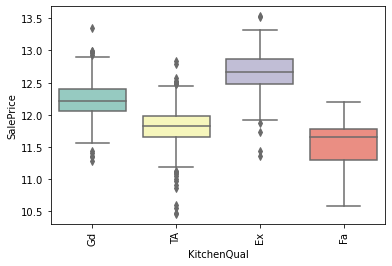

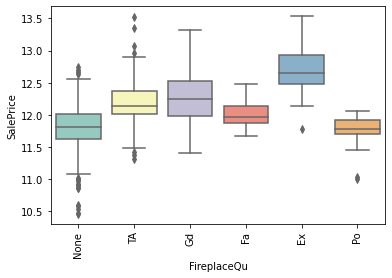

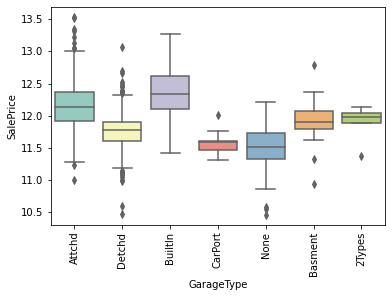

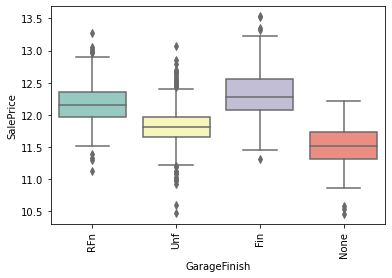

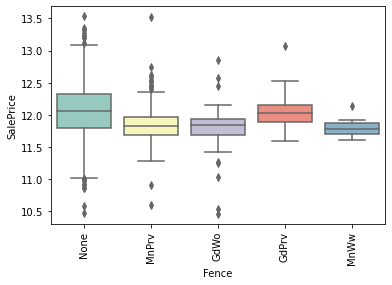

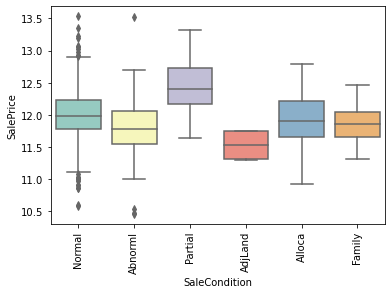

In [37]:
# Visualise boxplot for cateogrical columns with SalesPrice

for i in categorical_cols.columns:
    sns.boxplot(x = i, y="SalePrice", data=df, palette="Set3")
    plt.xticks(rotation=90)
    plt.show()

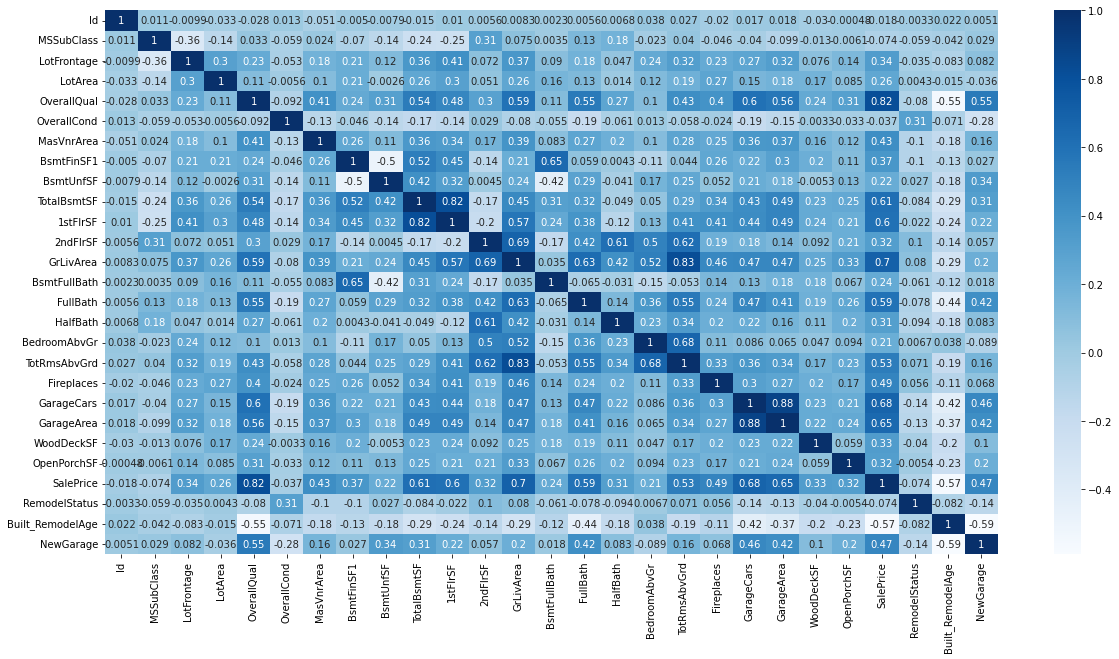

In [38]:
# Check the correlation of numerical columns

plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(), annot = True, cmap="Blues")
plt.show()

In [39]:
# Removing the highly correlated variables

df.drop(['TotRmsAbvGrd', 'GarageArea'], axis = 1, inplace = True)

In [40]:
# Since the values of the following fields are ordered list, we shall assign values to them in sequence

# For values which can be ordered, we have given an ordered sequence value
# For values which cannot be ordered, we have categorised them into 0 and 1

df['d_LotShape'] = df['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
df['d_ExterQual'] = df['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
df['d_BsmtQual'] = df['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df['d_BsmtExposure'] = df['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
df['d_BsmtFinType1'] = df['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 
                                                                 'None': 0})
df['d_HeatingQC'] = df['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df['d_KitchenQual'] = df['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df['d_FireplaceQu'] = df['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df['d_GarageFinish'] = df['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
df['d_BldgType'] = df['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 
                                                                 'None': 0 })
df['d_HouseStyle'] = df['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, 
                                                                 '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })
df['d_Fence'] = df['Fence'].map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'None': 0 })
df['d_LotConfig'] = df['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 
                                                           'None': 0  })
df['d_MasVnrType'] = df['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })
df['d_SaleCondition'] = df['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0, 
                                                                   'Alloca': 0, 'AdjLand': 0, 'None': 0})
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,5,4,0,2,1,4,0,5,1,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,5,3,3,2,1,1,0,2,0,1
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,5,4,3,2,1,4,0,5,1,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,4,4,4,1,1,4,0,4,0,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,5,4,3,2,1,4,0,2,1,1


In [41]:
# drop the old columns from which the new columns were derived
# We can also drop the id column as it will not be used any more

df = df.drop(['Id', 'LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 
                                'KitchenQual', 'FireplaceQu', 'GarageFinish', 'BldgType', 'HouseStyle', 'Fence', 
                                'LotConfig', 'MasVnrType', 'SaleCondition'], axis=1)

df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,...,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,...,5,4,0,2,1,4,0,5,1,1
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,...,5,3,3,2,1,1,0,2,0,1
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,...,5,4,3,2,1,4,0,5,1,1
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,...,4,4,4,1,1,4,0,4,0,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,...,5,4,3,2,1,4,0,2,1,1


In [42]:
# For the following columns create dummies

# Creating dummies for MSZoning

d_MSZoning = pd.get_dummies(df['MSZoning'], prefix='MSZoning', drop_first = True)
df = pd.concat([df, d_MSZoning], axis = 1)

# Creating dummies for Neighborhood

d_Neighborhood = pd.get_dummies(df['Neighborhood'], prefix='Neighborhood', drop_first = True)
df = pd.concat([df, d_Neighborhood], axis = 1)

# Creating dummies for RoofStyle

d_RoofStyle = pd.get_dummies(df['RoofStyle'], prefix='RoofStyle', drop_first = True)
df = pd.concat([df, d_RoofStyle], axis = 1)

# Creating dummies for Exterior1st

d_Exterior1st = pd.get_dummies(df['Exterior1st'], prefix='Exterior1st', drop_first = True)
df = pd.concat([df, d_Exterior1st], axis = 1)

# Creating dummies for Exterior2nd

d_Exterior2nd = pd.get_dummies(df['Exterior2nd'], prefix='Exterior2nd', drop_first = True)
df = pd.concat([df, d_Exterior2nd], axis = 1)

# Creating dummies for Foundation

d_Foundation = pd.get_dummies(df['Foundation'], prefix='Foundation', drop_first = True)
df = pd.concat([df, d_Foundation], axis = 1)

# Creating dummies for GarageType

d_GarageType = pd.get_dummies(df['GarageType'], prefix='GarageType', drop_first = True)
df = pd.concat([df, d_GarageType], axis = 1)

df.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,...,0,0,0,0,1,0,0,0,0,0
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,...,0,0,0,0,0,0,0,0,1,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0


In [43]:
# drop the below columns as we now have new columns derived from these columns

df = df.drop(['MSZoning', 'Neighborhood', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', 
                                'GarageType'], axis=1)

df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,65.0,8450,7,5,196.0,706,150,856,856,...,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,...,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,...,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,...,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,...,1,0,0,0,1,0,0,0,0,0


In [44]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 112 entries, MSSubClass to GarageType_None
dtypes: float64(3), int64(36), uint8(73)
memory usage: 549.1 KB
None


### Model Building

In [45]:
# Assigning all independent variable to X

X = df.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,65.0,8450,7,5,196.0,706,150,856,856,...,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,...,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,...,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,...,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,...,1,0,0,0,1,0,0,0,0,0


In [46]:
# Assigning target variable to y

y = df['SalePrice']
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [47]:
# scaling the features

from sklearn.preprocessing import scale

# storing column names in cols
# scaling (the dataframe is converted to a numpy array)

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone',
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_None'],
      dtype='object', length=111)

In [48]:
# splitting the data into train and test set

from sklearn.model_selection import train_test_split

np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=42)

In [49]:
# Running RFE with the output number of the variable equal to 50

lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, n_features_to_select=50)            
rfe = rfe.fit(X_train, y_train)

In [50]:
# Assign the columns selected by RFE to cols

col = X_train.columns[rfe.support_]

# assign the 50 features selected using RFE to a dataframe and view them

temp_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
temp_df = temp_df.loc[temp_df['rfe_support'] == True]
temp_df.reset_index(drop=True, inplace=True)

temp_df

,Variable,rfe_support,rfe_ranking
0,MSSubClass,True,1
1,LotFrontage,True,1
2,LotArea,True,1
3,OverallQual,True,1
4,OverallCond,True,1
5,BsmtFinSF1,True,1
6,1stFlrSF,True,1
7,2ndFlrSF,True,1
8,GrLivArea,True,1
9,BsmtFullBath,True,1


In [51]:
X_train_rfe = X_train[col]

In [52]:
# Associate the new 50 columns to X_train and X_test for further analysis

X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

In [53]:
print(X_test.shape)
print(X_train.shape)

(438, 50)
(1021, 50)


In [54]:
# list of alphas

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [55]:
# display the mean scores

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])


,param_alpha,mean_train_score,mean_test_score,rank_test_score
24,100,-0.088046,-0.095603,1
23,50,-0.087758,-0.096037,2
22,20,-0.087824,-0.096765,3
21,10.0,-0.087864,-0.097221,4
20,9.0,-0.087865,-0.097276,5
19,8.0,-0.087865,-0.097337,6
18,7.0,-0.087863,-0.097403,7
17,6.0,-0.087860,-0.097475,8
16,5.0,-0.087856,-0.097550,9
15,4.0,-0.087857,-0.097636,10


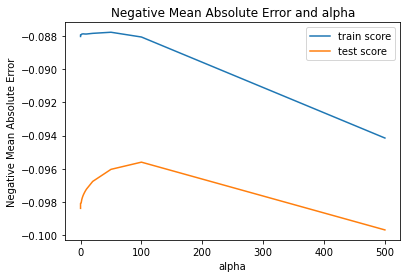

In [56]:
# plotting mean test and train scoes with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [57]:
# get the best estimator for lambda

ridge_model_cv.best_estimator_

Ridge(alpha=100)

In [58]:
# check the coefficient values with lambda = 100

alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-0.01856345, -0.01298588,  0.01425393,  0.07853595,  0.03309292,
       -0.00591238,  0.0340831 ,  0.01877009,  0.04720005,  0.02311334,
        0.02613691,  0.01937881,  0.02125309,  0.0160311 ,  0.05759651,
       -0.01149314, -0.02678878,  0.03446528,  0.0241139 ,  0.02306742,
        0.01825145,  0.02005793,  0.02061897, -0.0199968 , -0.00556128,
        0.01072147,  0.02369532,  0.00316303,  0.01588316, -0.01019476,
        0.01325943,  0.02308355,  0.00977095,  0.01844187,  0.02697707,
        0.02442716,  0.00910541, -0.01103725, -0.00284749,  0.01680586,
       -0.00110608, -0.01576855, -0.01209466,  0.01096513,  0.01010659,
        0.02606079,  0.00828131,  0.02673419,  0.00896017,  0.00858077])

In [59]:
# Check the mean squared error

mean_squared_error(y_test, ridge.predict(X_test))

0.018485890967691536

In [60]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,MSSubClass,-0.0186
1,LotFrontage,-0.0130
2,LotArea,0.0143
3,OverallQual,0.0785
4,OverallCond,0.0331
5,BsmtFinSF1,-0.0059
6,1stFlrSF,0.0341
7,2ndFlrSF,0.0188
8,GrLivArea,0.0472
9,BsmtFullBath,0.0231


In [61]:
# Assign the Features and their coefficient values to a dictionary which would be used while plotting the bar plot

ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_coeff_dict

{'MSSubClass': -0.0186,
 'LotFrontage': -0.013,
 'LotArea': 0.0143,
 'OverallQual': 0.0785,
 'OverallCond': 0.0331,
 'BsmtFinSF1': -0.0059,
 '1stFlrSF': 0.0341,
 '2ndFlrSF': 0.0188,
 'GrLivArea': 0.0472,
 'BsmtFullBath': 0.0231,
 'FullBath': 0.0261,
 'HalfBath': 0.0194,
 'BedroomAbvGr': 0.0213,
 'Fireplaces': 0.016,
 'GarageCars': 0.0576,
 'RemodelStatus': -0.0115,
 'Built_RemodelAge': -0.0268,
 'd_BsmtQual': 0.0345,
 'd_BsmtExposure': 0.0241,
 'd_BsmtFinType1': 0.0231,
 'd_HeatingQC': 0.0183,
 'd_KitchenQual': 0.0201,
 'd_FireplaceQu': 0.0206,
 'd_BldgType': -0.02,
 'd_HouseStyle': -0.0056,
 'd_SaleCondition': 0.0107,
 'MSZoning_FV': 0.0237,
 'MSZoning_RH': 0.0032,
 'MSZoning_RL': 0.0159,
 'MSZoning_RM': -0.0102,
 'Neighborhood_ClearCr': 0.0133,
 'Neighborhood_Crawfor': 0.0231,
 'Neighborhood_NPkVill': 0.0098,
 'Neighborhood_NoRidge': 0.0184,
 'Neighborhood_NridgHt': 0.027,
 'Neighborhood_StoneBr': 0.0244,
 'Neighborhood_Veenker': 0.0091,
 'RoofStyle_Gable': -0.011,
 'RoofStyle_Hip': 

In [62]:
# Do RFE to minimise the features to 15
X_train_ridge = X_train[ridge_df.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

rfe = RFE(lm,n_features_to_select= 15)            
rfe = rfe.fit(X_train_ridge, y_train)

In [63]:
# Method to get the coefficient values

def find(x):
    return ridge_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp1_df = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp1_df = temp1_df.loc[temp1_df['rfe_support'] == True]
temp1_df.reset_index(drop=True, inplace=True)

temp1_df['Coefficient'] = temp1_df['Features'].apply(find)
temp1_df = temp1_df.sort_values(by=['Coefficient'], ascending=False)
temp1_df = temp1_df.head(10)
temp1_df

,Features,rfe_support,rfe_ranking,Coefficient
1,OverallQual,True,1,0.0785
5,GarageCars,True,1,0.0576
3,GrLivArea,True,1,0.0472
7,d_BsmtQual,True,1,0.0345
2,OverallCond,True,1,0.0331
14,Foundation_PConc,True,1,0.0261
8,d_BsmtExposure,True,1,0.0241
10,MSZoning_FV,True,1,0.0237
4,BsmtFullBath,True,1,0.0231
9,d_FireplaceQu,True,1,0.0206


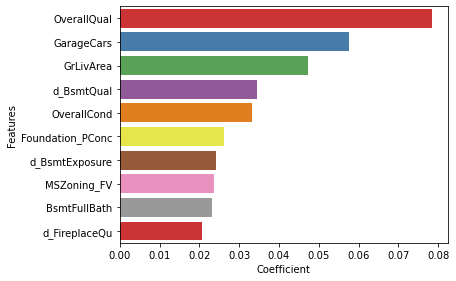

In [64]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp1_df)
plt.show()

In [65]:
lasso = Lasso()

# list of alphas

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [66]:
# display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
5,0.001,-0.087796,-0.096937,1
6,0.002,-0.088052,-0.097148,2
4,0.0005,-0.087739,-0.097479,3
7,0.003,-0.088550,-0.097506,4
3,0.0004,-0.087734,-0.097591,5
8,0.004,-0.089061,-0.097621,6
2,0.0003,-0.087748,-0.097671,7
1,0.0002,-0.087773,-0.097908,8
9,0.005,-0.089680,-0.097913,9
0,0.0001,-0.087843,-0.098182,10


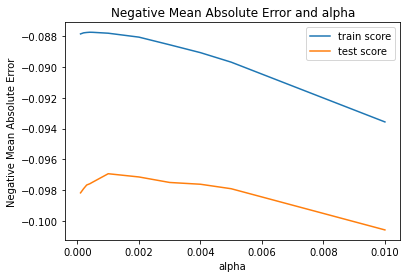

In [67]:
# plotting mean test and train scoes with alpha 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

# plotting

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [68]:
# get the best estimator for lambda

lasso_model_cv.best_estimator_

Lasso(alpha=0.001)

In [69]:
# check the coefficient values with lambda = 0.0001

alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([-0.01321729, -0.01924056,  0.01481978,  0.09094434,  0.0354409 ,
       -0.01391079, -0.01553204, -0.03907752,  0.1206067 ,  0.02698181,
        0.02429498,  0.01938587,  0.02206275,  0.01415229,  0.05902991,
       -0.01142201, -0.02695467,  0.03692382,  0.02571392,  0.0273763 ,
        0.01890789,  0.01184797,  0.01855688, -0.03199147, -0.01152195,
        0.00886545,  0.0608595 ,  0.02096383,  0.08287437,  0.05161978,
        0.01359547,  0.02567861,  0.01412998,  0.019113  ,  0.03089841,
        0.02677302,  0.00966689, -0.02050554, -0.0136015 ,  0.0169327 ,
       -0.00068767, -0.02428039, -0.015394  ,  0.02050439,  0.02778617,
        0.03901559,  0.01630607,  0.03227809,  0.01152325,  0.01576924])

In [70]:
# Check the mean squared error

mean_squared_error(y_test, lasso.predict(X_test))

0.017498105757504077

In [71]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,MSSubClass,-0.0132
1,LotFrontage,-0.0192
2,LotArea,0.0148
3,OverallQual,0.0909
4,OverallCond,0.0354
5,BsmtFinSF1,-0.0139
6,1stFlrSF,-0.0155
7,2ndFlrSF,-0.0391
8,GrLivArea,0.1206
9,BsmtFullBath,0.0270


In [72]:
# Put the Features and Coefficients in dictionary

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'MSSubClass': -0.01321729424470529,
 'LotFrontage': -0.019240558978742796,
 'LotArea': 0.014819781946324922,
 'OverallQual': 0.09094434423876062,
 'OverallCond': 0.03544090493572307,
 'BsmtFinSF1': -0.013910793654451411,
 '1stFlrSF': -0.015532038887552061,
 '2ndFlrSF': -0.039077515261613543,
 'GrLivArea': 0.12060669755969812,
 'BsmtFullBath': 0.02698180561667768,
 'FullBath': 0.02429498354291754,
 'HalfBath': 0.019385873996477395,
 'BedroomAbvGr': 0.022062752767424348,
 'Fireplaces': 0.01415228959695081,
 'GarageCars': 0.05902990503897765,
 'RemodelStatus': -0.011422012703714499,
 'Built_RemodelAge': -0.02695467104466471,
 'd_BsmtQual': 0.03692381839012324,
 'd_BsmtExposure': 0.02571391658724332,
 'd_BsmtFinType1': 0.02737630443689891,
 'd_HeatingQC': 0.018907887940925888,
 'd_KitchenQual': 0.01184796542436569,
 'd_FireplaceQu': 0.01855687835594781,
 'd_BldgType': -0.031991467709345904,
 'd_HouseStyle': -0.01152194750161909,
 'd_SaleCondition': 0.008865446493442194,
 'MSZoning_FV': 0.

In [73]:
# Do an RFE to minimise the features to 15

X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

rfe = RFE(lm, n_features_to_select=15)            
rfe = rfe.fit(X_train_lasso, y_train)

In [74]:
# Method to get the coefficient values

def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp2_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df = temp2_df.head(10)
temp2_df

,Features,rfe_support,rfe_ranking,Coefficient
3,GrLivArea,True,1,0.120607
1,OverallQual,True,1,0.090944
12,MSZoning_RL,True,1,0.082874
10,MSZoning_FV,True,1,0.060860
5,GarageCars,True,1,0.059030
13,MSZoning_RM,True,1,0.051620
14,Foundation_PConc,True,1,0.039016
7,d_BsmtQual,True,1,0.036924
2,OverallCond,True,1,0.035441
4,BsmtFullBath,True,1,0.026982


In [75]:
# Method to get the coefficient values

def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp2_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df = temp2_df.head(10)
temp2_df

,Features,rfe_support,rfe_ranking,Coefficient
3,GrLivArea,True,1,0.120607
1,OverallQual,True,1,0.090944
12,MSZoning_RL,True,1,0.082874
10,MSZoning_FV,True,1,0.060860
5,GarageCars,True,1,0.059030
13,MSZoning_RM,True,1,0.051620
14,Foundation_PConc,True,1,0.039016
7,d_BsmtQual,True,1,0.036924
2,OverallCond,True,1,0.035441
4,BsmtFullBath,True,1,0.026982


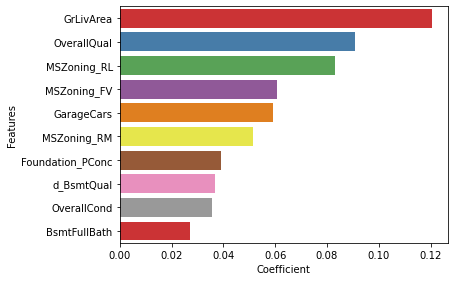

In [76]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp2_df)
plt.show()

*****************************************************End of File*********************************************************